In [1]:
# babylonian algorithm for square root
function Babylonian(x; N=10)
    t = (1+x)/2
    for i = 2:N
        t = (t + x/t)/2
    end
    t
end

Babylonian (generic function with 1 method)

In [5]:
Babylonian(4; N=50)

2.0

In [3]:
Babylonian(π), √π

(1.7724538509055159, 1.7724538509055159)

In [14]:
using Plots

Plots.GRBackend()

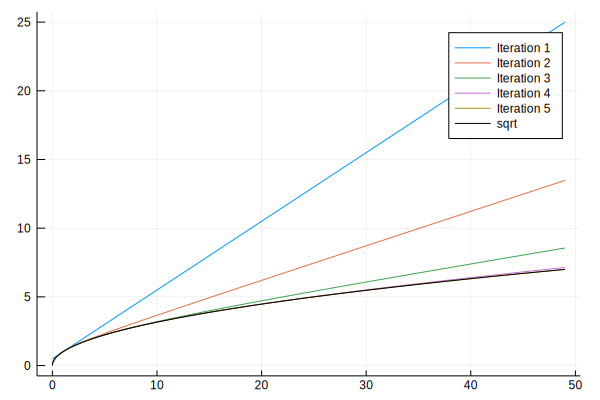

In [16]:
i = 0:0.01:49

plot([x->Babylonian(x; N=k) for k = 1:5], i,
    label=["Iteration $j" for _ = 1:1, j = 1:5])
plot!(sqrt, i, c="black", label="sqrt")

In [10]:
struct D <: Number  # function, derivative pair
    f::Tuple{Float64, Float64}
end

In [11]:
import Base: +, /, convert, promote_rule
+(x::D, y::D) = D(x.f .+ y.f)
/(x::D, y::D) = D((x.f[1]/y.f[1], (y.f[1] * x.f[2] - x.f[1] * y.f[2]) / y.f[1]^2))
convert(::Type{D}, x::Real) = D((x,zero(x)))
promote_rule(::Type{D}, ::Type{<:Number}) = D

promote_rule (generic function with 134 methods)

In [8]:
x = 49;

In [12]:
Babylonian(D((x,1)))

D((7.0, 0.07142857142857142))

In [13]:
(√x, 0.5/√x)

(7.0, 0.07142857142857142)

In [22]:
using ForwardDiff